In [1]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in illustris SFH file from Tijske
dat = h5py.File('binsv2all1e8Msunh_z0.hdf5', 'r')
dat.keys()

[u'CurrentStellarMass',
 u'FormedStellarMass',
 u'MeanStellarAge',
 u'MeanStellarMetallicity']

In [49]:
print dat['CurrentStellarMass'].value

[[  2.13189103e+02]
 [  4.38301970e+01]
 [  2.84316784e+01]
 ..., 
 [  1.61684624e-02]
 [  1.17015522e-02]
 [  1.28739683e-02]]


In [10]:
# 'FormedStellarMass' is supposedly a 2D grid of SFHs
sfh_grid = dat['FormedStellarMass'].value
print sfh_grid.shape

(66808, 16, 56)


In [51]:
t_bins = np.array([0.0, 0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.125,0.175,0.225,0.275,0.325,0.375,0.425,0.475,0.55,0.65,0.75,0.85,0.95,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,3.125,3.375,3.625,3.875,4.25,4.75,5.25,5.75,6.25,6.75,7.25,7.75,8.25,8.75,9.25,9.75,10.25,10.75,11.25,11.75,12.25,12.75,13.25,13.75])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


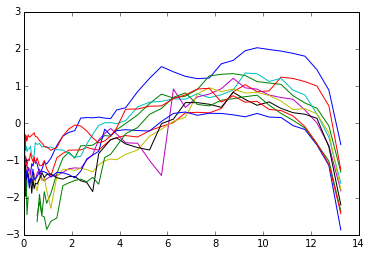

In [62]:
for i in range(10): 
    # sum along metallicity 
    dm_i = np.sum([sfh_grid[i,j,:] for j in range(sfh_grid.shape[1])], axis=0)

    sfr_i = dm_i[:-1]/(t_bins[1:] - t_bins[:-1])
    plt.plot(t_bins[:-1], np.log10(sfr_i))
#plt.xlim([0,13.75])

## total stellar mass